In [29]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam
from keras.layers import Input
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_percentage_error



In [18]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rahulsah06/gooogle-stock-price")

print("Path to dataset files:", path)

# Load and Concatenate Data
df_train = pd.read_csv('/kaggle/input/gooogle-stock-price/Google_Stock_Price_Train.csv')
df_test = pd.read_csv('/kaggle/input/gooogle-stock-price/Google_Stock_Price_Test.csv')
df = pd.concat([df_train, df_test])
df = df.loc[:, ["Open"]].values

# Scale Data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(df_train[['Open']].values)



Path to dataset files: /kaggle/input/gooogle-stock-price


In [19]:
# Create Training Data (X_train, y_train)
X_train, y_train = [], []
timesteps = 50  # Baseline timesteps

for i in range(timesteps, train_scaled.shape[0]):
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i, 0])

# Convert to NumPy arrays and reshape
X_train = np.array(X_train)
y_train = np.array(y_train)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

# Reshape data for LSTM input (3D array: samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [20]:
# Define the model
def build_and_train_model(X_train, y_train, timesteps=50, units=50, dropout_rate=0.2, learning_rate=0.001, epochs=50):
    model = Sequential()

    # Input layer (to avoid the warning)
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Shape should be (timesteps, features)

    # LSTM layer 1
    model.add(LSTM(units=units, return_sequences=True))

    # Dropout layer
    model.add(Dropout(dropout_rate))

    # LSTM layer 2
    model.add(LSTM(units=units, return_sequences=False))

    # Dropout layer
    model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(units=1))

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    return model, history



In [21]:
# Baseline Model (No Hyperparameter Tuning)
baseline_model, baseline_history = build_and_train_model(
    X_train, y_train, timesteps=50, units=50, dropout_rate=0.2, learning_rate=0.001, epochs=50
)



Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0381 - val_loss: 0.0031
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0038 - val_loss: 0.0014
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0034 - val_loss: 0.0018
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0028 - val_loss: 0.0021
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0028 - val_loss: 0.0043
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0026 - val_loss: 0.0016
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0026 - val_loss: 0.0017
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0

In [22]:
# Tuned Model (With Hyperparameter Tuning)
tuned_model, tuned_history = build_and_train_model(
    X_train, y_train, timesteps=60, units=100, dropout_rate=0.3, learning_rate=0.001, epochs=50
)



Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 0.0472 - val_loss: 0.0131
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0035 - val_loss: 0.0012
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0023 - val_loss: 0.0012
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0021 - val_loss: 0.0030
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0022 - val_loss: 0.0039
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0036 - val_loss: 0.0015
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0022 - val_loss: 0.0023
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0

In [23]:
# Prepare Test Data
inputs = df[len(df) - len(df_test) - timesteps:]
inputs = scaler.transform(inputs)

X_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i-timesteps:i, 0])

# Convert list X_test to numpy array and reshape
X_test = np.array(X_test)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [28]:
# Predictions
baseline_predictions = baseline_model.predict(X_test)
baseline_predictions = scaler.inverse_transform(baseline_predictions)

tuned_predictions = tuned_model.predict(X_test)
tuned_predictions = scaler.inverse_transform(tuned_predictions)

print("Baseline Predictions:")
print(baseline_predictions)

print("\nTuned Predictions:")
print(tuned_predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Baseline Predictions:
[[772.1889 ]
 [769.5944 ]
 [768.85626]
 [768.65125]
 [770.328  ]
 [774.38367]
 [779.06793]
 [782.834  ]
 [785.9244 ]
 [788.1648 ]
 [789.51733]
 [789.9766 ]
 [789.80035]
 [789.62537]
 [789.49536]
 [791.9026 ]
 [796.15314]
 [801.9102 ]
 [806.82916]
 [807.225  ]]

Tuned Predictions:
[[772.02997]
 [769.2607 ]
 [768.8424 ]
 [768.99536]
 [771.28406]
 [776.225  ]
 [781.5135 ]
 [785.26715]
 [788.0219 ]
 [789.78815]
 [790.65625]
 [790.68665]
 [790.21155]
 [789.98376]
 [789.96326]
 [793.1225 ]
 [798.3681 ]
 [805.0702 ]
 [810.2776 ]
 [809.64044]]


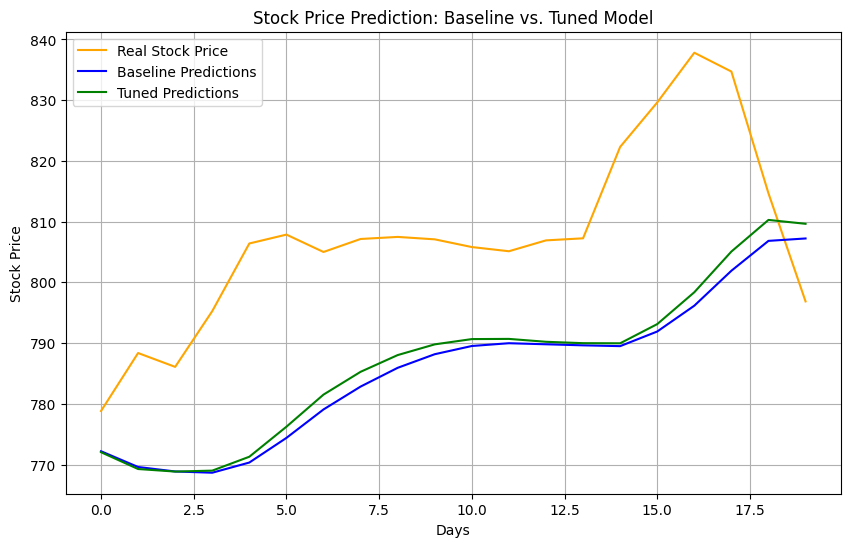

Baseline Model MSE: 624.2485
Tuned Model MSE: 567.4332
Baseline Model MAPE: 2.83%
Tuned Model MAPE: 2.69%


<Figure size 1200x600 with 0 Axes>

In [30]:
# Plot Comparison
plt.figure(figsize=(10, 6))
plt.plot(df_test['Open'].values, color="orange", label="Real Stock Price")  # Actual data
plt.plot(baseline_predictions, color="blue", label="Baseline Predictions")
plt.plot(tuned_predictions, color="green", label="Tuned Predictions")
plt.title("Stock Price Prediction: Baseline vs. Tuned Model")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()

# Evaluate and Print Mean Squared Errors
baseline_mse = mean_squared_error(df_test['Open'].values, baseline_predictions)
tuned_mse = mean_squared_error(df_test['Open'].values, tuned_predictions)

print(f"Baseline Model MSE: {baseline_mse:.4f}")
print(f"Tuned Model MSE: {tuned_mse:.4f}")

# Plot Training & Validation Loss for Both Models
plt.figure(figsize=(12, 6))

# Calculate MAPE for Baseline Model
baseline_mape = mean_absolute_percentage_error(df_test['Open'].values, baseline_predictions.flatten())
print(f"Baseline Model MAPE: {baseline_mape * 100:.2f}%")

# Calculate MAPE for Tuned Model
tuned_mape = mean_absolute_percentage_error(df_test['Open'].values, tuned_predictions.flatten())
print(f"Tuned Model MAPE: {tuned_mape * 100:.2f}%")

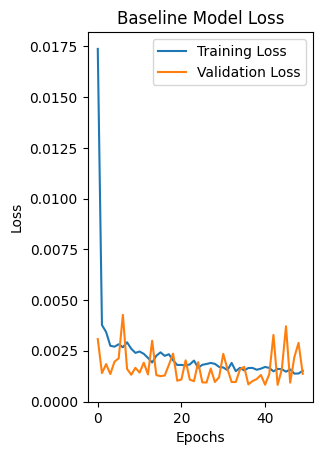

In [26]:

# Baseline Model Loss
plt.subplot(1, 2, 1)
plt.plot(baseline_history.history['loss'], label='Training Loss')
plt.plot(baseline_history.history['val_loss'], label='Validation Loss')
plt.title("Baseline Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()



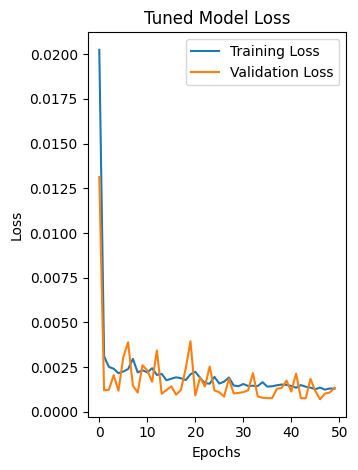

In [27]:
# Tuned Model Loss
plt.subplot(1, 2, 2)
plt.plot(tuned_history.history['loss'], label='Training Loss')
plt.plot(tuned_history.history['val_loss'], label='Validation Loss')
plt.title("Tuned Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()